## **Data Engineering Task Notebook**

This notebook is designed to test you through various Data Engineering tasks using the Online Retail II dataset. The tasks will help you develop essential skills in data cleaning, feature engineering, and transforming raw data into valuable insights. You'll explore tasks like handling missing values, aggregating data, creating new features, and performing data joins to simulate real-world data workflows. These tasks will prepare you for more advanced data manipulation and analysis, enhancing your ability to work with large, complex datasets.

# **About the Dataset**
This Online Retail II dataset contains transactional data from a UK-based online retailer selling unique gift-ware. The data covers transactions that occurred between December 1, 2009 and December 9, 2011. The retailer primarily serves both individual customers and wholesalers. The products sold by the company are all-occasion gift items, including home décor, kitchenware, and other unique items.

The dataset includes detailed information on each transaction, providing valuable insights into customer behavior, sales trends, and product performance over time.



## **What can be done with this dataset?**

**Customer Behavior Analysis:** Explore purchasing patterns, repeat customers, and sales volume across different customer segments.

**Sales Forecasting:** Predict future sales by analyzing past transactions, including seasonal trends and demand fluctuations.

**Market Segmentation:** Identify customer groups based on purchase history and demographic data (e.g., by Country).

**Product Performance:** Analyze which products are bestsellers and which have low turnover, and how prices influence sales.

**Time Series Analysis:** Study trends over time, including hourly, daily, and monthly sales volumes, and identify peak shopping periods.

**Anomaly Detection:** Detect potential fraudulent transactions, cancellations, or unusually high sales activity.
Association Rule Mining: Discover products that are often purchased together and identify cross-sell opportunities.



## **Key Attributes in the Dataset:**

**InvoiceNo:** Unique transaction identifier (with cancellations indicated by 'C' prefix).

**StockCode:** Unique product code for each item sold.

**Description:** Name of the product/item sold.

**Quantity:** Quantity of each product sold in the transaction
.
**InvoiceDate:** Date and time of the transaction.

**UnitPrice:** Price per unit of the product.

**CustomerID:** Unique identifier for each customer.

**Country:** The country where the customer resides.

This dataset is a great resource for learning and practicing various data analysis, machine learning, and business intelligence techniques.

## **Exercise**
Complete the following tasks:
1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset) from Kaggle.
2. Visualize the dataset and it's structure using appropriate libraries and plots.
3. Do some basic cleaning to handle missing values
4. Create the following features:
  *   Revenue
  *   DayOfWeek: to analyze sales trends by weekdays.
  *   TotalRevenue for each CustomerID
  *   Most popular product based on Revenue.
  *   Ordersize by summing Quantity for each InvoiceNo

5. Apply a lambda function to segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
6. Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
7. Wrap all fo the above into an ETL pipeline.

Extra tasks for practicing GroupBy
1. Join CustomerID with TotalRevenue to create Customer_Revenue column
2. Group by Country to find total revenue, total customers, and average order size per country.
3. Group by StockCode to find top-selling products by quantity.
4. Group by CustomerID to calculate the average order value or frequency of purchases.







             








## 1. Load the dataset from Kaggle.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [8]:
#conda install anaconda::kagglehub
#!pip install kagglehub

In [5]:
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Bobby\.cache\kagglehub\datasets\lakshmi25npathi\online-retail-dataset\versions\1


In [9]:
dataset_path = "C:/Users/Bobby/.cache/kagglehub/datasets/lakshmi25npathi/online-retail-dataset/versions/1"
# bruger/bobby
files = os.listdir(dataset_path)
print(files)

['online_retail_II.xlsx']


In [11]:
file_path = "C:/Users/Bobby/.cache/kagglehub/datasets/lakshmi25npathi/online-retail-dataset/versions/1/online_retail_II.xlsx"

df = pd.read_excel(file_path)

## 2. Visualize the dataset and it's structure using appropriate libraries and plots

In [13]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [16]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [285]:
df["Customer ID"].isna().value_counts()

Customer ID
False    417534
True     107927
Name: count, dtype: int64

In [17]:
df["Country"].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

In [18]:
df["Country"].nunique()

40

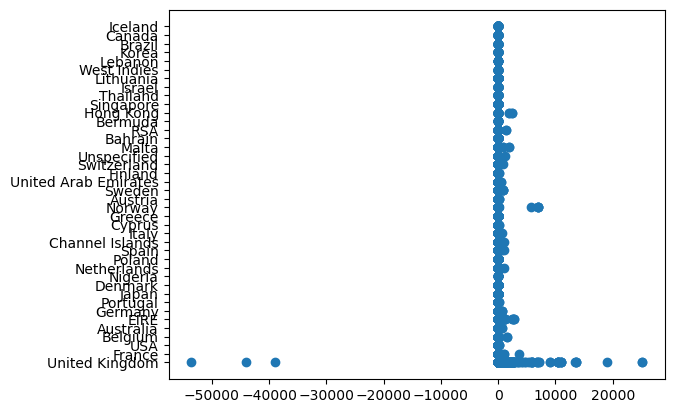

In [19]:
plt.scatter(x = "Price", y = "Country", data = df)

In [55]:
pd.crosstab(df['Country'],df['Price'])

Price,-53594.360,-44031.790,-38925.870,0.000,0.001,0.010,0.030,0.040,0.050,0.060,...,6706.710,6958.170,7044.790,8985.600,10468.800,10953.500,13474.790,13541.330,18910.690,25111.090
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bahrain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgium,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bermuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Canada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Channel Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cyprus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df["StockCode"].nunique()

4632

In [73]:
df["StockCode"].unique()

array([85048, '79323P', '79323W', ..., 22935, 22933, 21120], dtype=object)

In [81]:
df["StockCode"].value_counts()

StockCode
85123A    3516
22423     2221
85099B    2057
21212     1933
21232     1843
          ... 
90005B       1
90197C       1
90080        1
20904        1
21120        1
Name: count, Length: 4632, dtype: int64

In [79]:
df["StockCode"].describe()

count     525461
unique      4632
top       85123A
freq        3516
Name: StockCode, dtype: object

In [83]:
df["StockCode"].value_counts().describe()

count    4632.000000
mean      113.441494
std       193.402044
min         1.000000
25%        10.000000
50%        42.000000
75%       131.000000
max      3516.000000
Name: count, dtype: float64

In [87]:
# the price is the total, Also there is a difference in Description for this item, also with a minus in quantity

In [85]:
df[df["StockCode"] == "85123A"] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
102,489442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-12-01 09:46:00,2.95,13635.0,United Kingdom
147,489446,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2009-12-01 10:06:00,2.55,13758.0,United Kingdom
271,489465,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2009-12-01 10:52:00,2.55,13767.0,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
366,489517,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2009-12-01 11:34:00,2.95,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
524412,538086,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14,2010-12-09 14:44:00,2.95,12872.0,United Kingdom
524519,538095,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-09 14:55:00,2.95,17097.0,Spain
524733,538145,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom
525223,538157,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-09 16:57:00,2.95,17576.0,United Kingdom


In [107]:
df[df["StockCode"] == "85123A"]["Description"].nunique() # wonder if there are more examples of this

2

In [119]:
df["Description"].nunique() # a few more examples of this yes!

4681

In [117]:
df["StockCode"].nunique()

4632

In [175]:
df.groupby("Invoice")["InvoiceDate"].nunique() # some invoice don't have the same corelated invoiceDate

Invoice
489434     1
489435     1
489436     1
489437     1
489438     1
          ..
C538121    1
C538122    1
C538123    1
C538124    1
C538164    1
Name: InvoiceDate, Length: 28816, dtype: int64

In [173]:
df.groupby("Invoice")["InvoiceDate"].nunique().sum() # there is 28857 invoiceDates but only 28816 different invoices

28857

In [177]:
df.groupby("Invoice")["Country"].nunique() # All invoice has the same country

Invoice
489434     1
489435     1
489436     1
489437     1
489438     1
          ..
C538121    1
C538122    1
C538123    1
C538124    1
C538164    1
Name: Country, Length: 28816, dtype: int64

In [179]:
df.groupby("Invoice")["Country"].nunique().sum()

28816

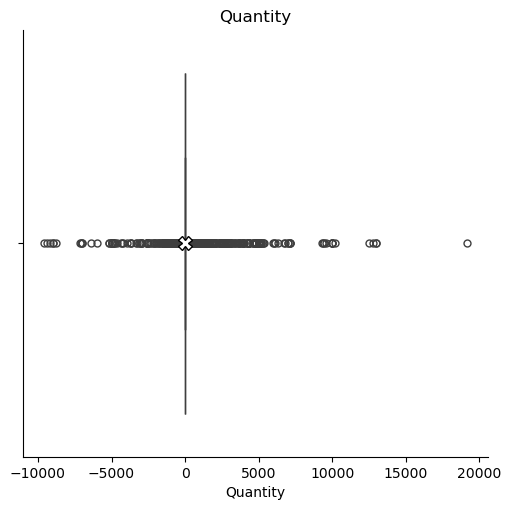

In [123]:
sns.catplot(x="Quantity", data = df, estimator='mean', kind="box", showmeans=True, meanprops={"marker": "X", "markerfacecolor": "white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Quantity")
plt.xlabel("Quantity")
plt.show()

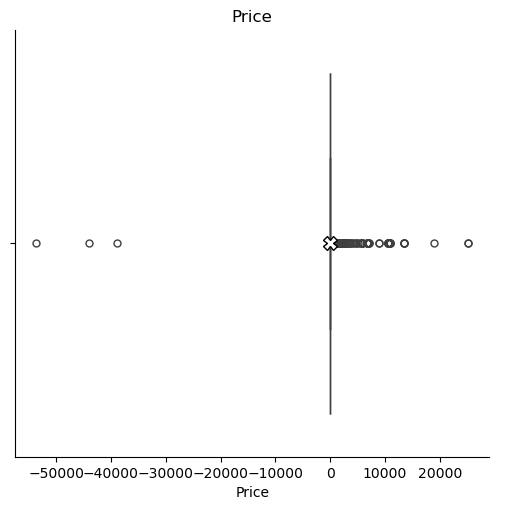

In [124]:
sns.catplot(x="Price", data = df, estimator='mean', kind="box", showmeans=True, meanprops={"marker": "X", "markerfacecolor": "white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Price")
plt.xlabel("Price")
plt.show()

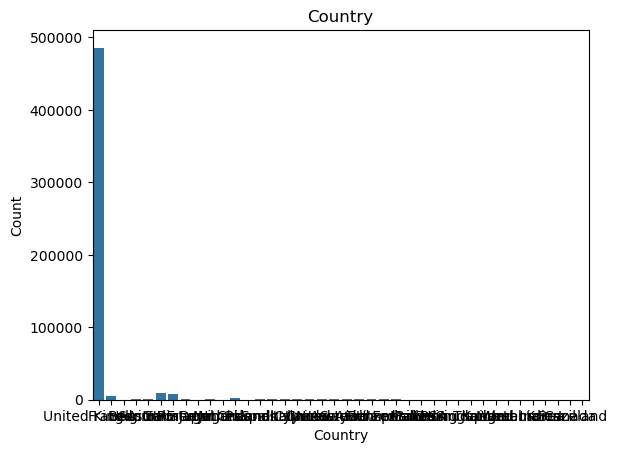

In [53]:
sns.countplot(x = "Country", data = df)
plt.title("Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [20]:
df["Price"].nunique()

1606

In [21]:
df["Price"].value_counts().get(0)

3687

In [22]:
df.groupby('Invoice')[['Price']].sum()

,Price
Invoice,
489434,32.65
489435,10.50
489436,70.88
489437,83.45
489438,44.05
...,...
C538121,12.75
C538122,1.25
C538123,5.40


In [23]:
df.groupby('Invoice')[['Price']].value_counts()

Invoice  Price
489434   1.25     2
         6.75     2
         1.65     1
         2.10     1
         5.95     1
                 ..
C538123  2.10     1
C538124  0.50     1
         2.95     1
         12.75    1
C538164  1.95     1
Name: count, Length: 204490, dtype: int64

In [24]:
df.groupby('Invoice').value_counts()

Invoice  StockCode  Description                         Quantity  InvoiceDate          Price  Customer ID  Country       
489434   21232      STRAWBERRY CERAMIC TRINKET BOX       24       2009-12-01 07:45:00  1.25   13085.0      United Kingdom    1
         21523      FANCY FONT HOME SWEET HOME DOORMAT   10       2009-12-01 07:45:00  5.95   13085.0      United Kingdom    1
         21871      SAVE THE PLANET MUG                  24       2009-12-01 07:45:00  1.25   13085.0      United Kingdom    1
         22041      RECORD FRAME 7" SINGLE SIZE          48       2009-12-01 07:45:00  2.10   13085.0      United Kingdom    1
         22064      PINK DOUGHNUT TRINKET POT            24       2009-12-01 07:45:00  1.65   13085.0      United Kingdom    1
                                                                                                                            ..
C538123  22956      36 FOIL HEART CAKE CASES            -2        2010-12-09 15:41:00  2.10   12605.0      Germany  

In [25]:
df.groupby('Invoice')["StockCode"].nunique()

Invoice
489434      8
489435      4
489436     19
489437     23
489438     17
           ..
C538121     1
C538122     1
C538123     3
C538124     3
C538164     1
Name: StockCode, Length: 28816, dtype: int64

In [26]:
df.groupby('Invoice')["StockCode"].nunique().describe() # one invoice has a mean of 17 stockcodes(17 different items)

count    28816.000000
mean        17.772279
std         34.182193
min          1.000000
25%          1.000000
50%          8.000000
75%         22.000000
max        674.000000
Name: StockCode, dtype: float64

In [27]:
df.groupby('Invoice')[['Price']].mean()

,Price
Invoice,
489434,4.081250
489435,2.625000
489436,3.730526
489437,3.628261
489438,2.591176
...,...
C538121,12.750000
C538122,1.250000
C538123,1.800000


In [28]:
df.groupby('Country')[['Customer ID']].value_counts()

Country      Customer ID
Australia    12415.0        212
             12431.0         84
             12424.0         67
             12389.0         49
             12393.0         48
                           ... 
Unspecified  14265.0         48
             12470.0         23
             12351.0         21
             15357.0          1
West Indies  18140.0         54
Name: count, Length: 4388, dtype: int64

In [29]:
df.groupby('Country')[['Customer ID']].value_counts()

Country      Customer ID
Australia    12415.0        212
             12431.0         84
             12424.0         67
             12389.0         49
             12393.0         48
                           ... 
Unspecified  14265.0         48
             12470.0         23
             12351.0         21
             15357.0          1
West Indies  18140.0         54
Name: count, Length: 4388, dtype: int64

# 3. Do some basic cleaning to handle missing values

## lots of issues
  *   Same stock code has different descriptions
  *   Same invoice has different invoiceDate
  *   Negative prices and quantities

In [192]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

##### there are 3687 products with the price of 0, this would get rid of a good portion of them

##### also a good portion of them seems to be negative quantitives as well, dobbel bam

In [208]:
df[df["Description"].isna()] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524730,538141,22218,NaN,2,2010-12-09 15:58:00,0.0,NaN,United Kingdom
524731,538143,84534B,NaN,1,2010-12-09 15:58:00,0.0,NaN,United Kingdom
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,NaN,United Kingdom


In [220]:
df[df["Description"].isna()]["Price"].nunique() # they all share the same price of 0

1

In [222]:
df[df["Description"].isna()]["Customer ID"].nunique()

0

In [224]:
df[df["Description"].isna()]["StockCode"].nunique() # amount of products affected with bad values 1920

1920

##### cleaning this alone should do a lot of good

In [233]:
temp = df.copy()
print(temp.isna().sum())

# my argument is that 20% of the data has missing customer id, which is quite a lot, there is still usefull data in there and don't want to drop it
# also given that the procentage is so large then it might be a feature
#my_df = temp.dropna() # drop all Nan values
my_df = temp.dropna(subset=["Description"]) # only drop by a given column

print(my_df.isna().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    104999
Country             0
dtype: int64


In [263]:
df["Price"].value_counts().get(0)

3687

In [265]:
my_df["Price"].value_counts().get(0)

759

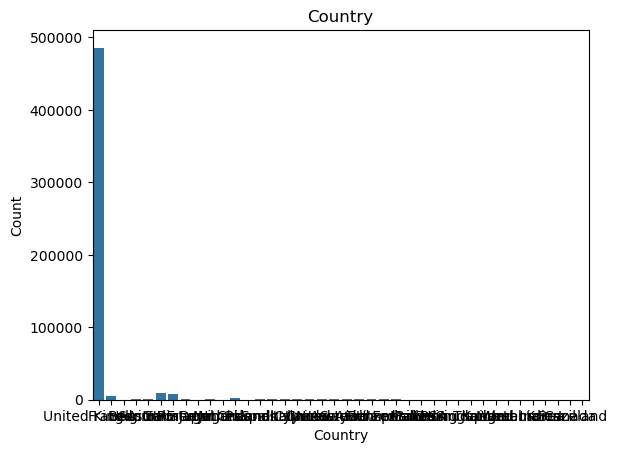

In [267]:
sns.countplot(x = "Country", data = df)
plt.title("Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

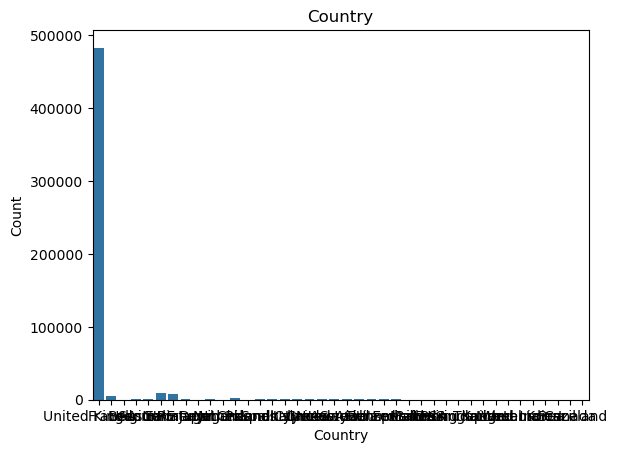

In [269]:
sns.countplot(x = "Country", data = my_df)
plt.title("Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

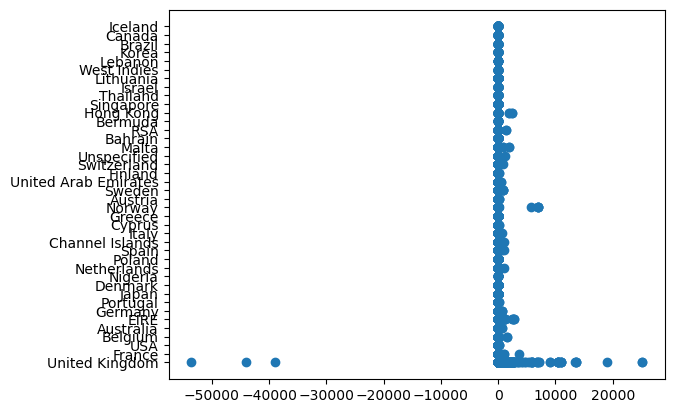

In [237]:
plt.scatter(x = "Price", y = "Country", data = df)

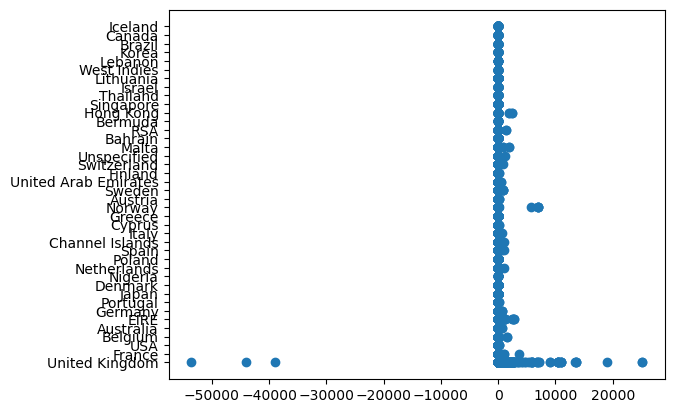

In [239]:
plt.scatter(x = "Price", y = "Country", data = my_df) # litterally no difference

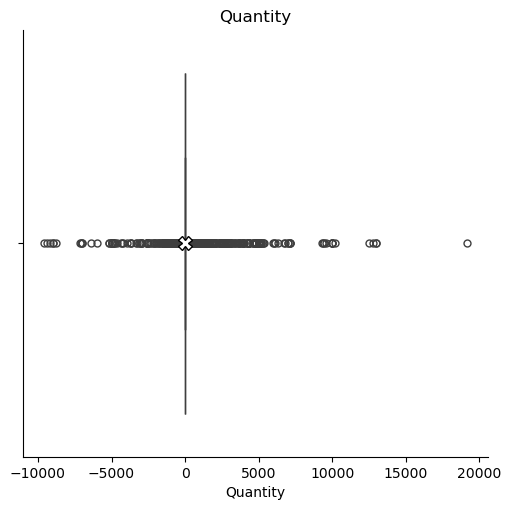

In [257]:
sns.catplot(x="Quantity", data = df, estimator='mean', kind="box", showmeans=True, meanprops={"marker": "X", "markerfacecolor": "white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Quantity")
plt.xlabel("Quantity")
plt.show()

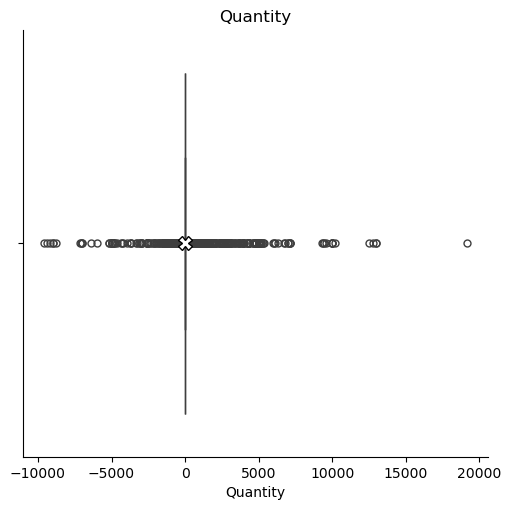

In [261]:
sns.catplot(x="Quantity", data = df, estimator='mean', kind="box", showmeans=True, meanprops={"marker": "X", "markerfacecolor": "white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Quantity")
plt.xlabel("Quantity")
plt.show()

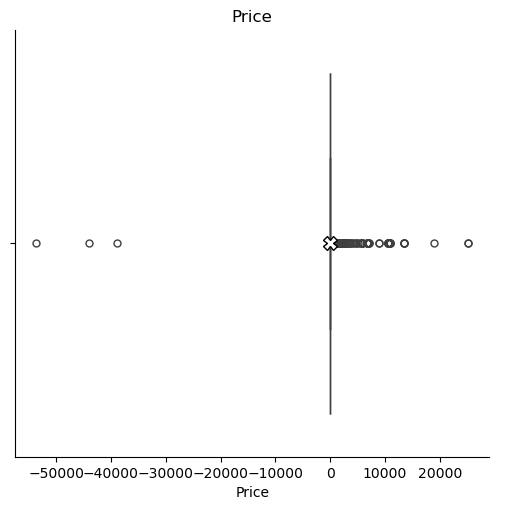

In [259]:
sns.catplot(x="Price", data = my_df, estimator='mean', kind="box", showmeans=True, meanprops={"marker": "X", "markerfacecolor": "white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Price")
plt.xlabel("Price")
plt.show()

In [17]:
#x = ["Country", "Country"] # it wont allow Price and other be carefull

#for i in x:
 #   sns.histplot(x=i, data = df)
 #   plt.show()

## 4. Create the following features:

     Revenue

In [20]:
#create it

## we have the price and quantity which has to be multiplied

    DayOfWeek: to analyze sales trends by weekdays.

In [291]:
#create it

    TotalRevenue for each CustomerID

In [291]:
#create it

    Most popular product based on Revenue.

In [291]:
#create it

    Ordersize by summing Quantity for each InvoiceNo

In [291]:
#create it